# Práctica de Calibración de cámaras

Máster Universitario en Visión Artificial, URJC <br>
Visión Tridimensional 2022-23 <br>
Practica 1. Febrero de 2023

Este enunciado está en el archivo "PracticaCalib2023_Alumnos.ipynb" o su versión "pdf" que puedes encontrar en el Aula Virtual.

## Objetivos


Los objetivos de esta práctica son:
* Calibrar una cámara usando el método de calibración de Zhang, implementado en OpenCV.
* Hacer uso de los resultados de la calibración para tomar diferentes medidas en las imágenes.
* Calibrar una cámara a partir de una única imagen de diferentes formas.

## Requerimientos

Para esta práctica es necesario disponer del siguiente software:
* Python 3.X 
* Jupyter http://jupyter.org/.
* Las librerías científicas de Python: NumPy, SciPy, y Matplotlib.
* La librería OpenCV.

El material necesario para la práctica se puede descargar del Aula Virtual en la carpeta ``MaterialesPractica``. Esta carpeta contiene:
* Una secuencia de imágenes tomadas con una cámara de móvil en alta resolución en el directorio ``calibration_pattern``.
* Una imagen de un cubo de Rubik 4x4 tomada con el mismo móvil y resolución, directorio ``cubo_rubik_4x4``.
* Imágenes tomadas en interiores del Departamental II con el mismo móvil y resolución, directorio ``departamental2_urjc``.

## Condiciones

* La fecha límite de entrega será el viernes 24 de marzo de 2023 a las 23:55 (en el Aula Virtual)
* La entrega consiste en dos archivos con el código, resultados y respuestas a los ejercicios:
  1. Un "notebook" de Jupyter con los resultados. Las respuestas a los ejercicios debes introducirlas en tantas celdas de código o texto como creas necesarias, insertadas inmediatamente después de  un enuciado y antes del siguiente.
  2. Un documento "pdf" generado a partir del fuente de Jupyter, por ejemplo usando el comando ``jupyter nbconvert --execute --to pdf notebook.ipynb``, o simplemente imprimiendo el "notebook" desde el navegador en la opción del menú "File->Print preview". Asegúrate de que el documento "pdf" contiene todos los resultados correctamente ejecutados.

## 1. Calibración de una cámara

En esta parte se trabajará con la secuencia de imágenes del directorio ``calibration_pattern``. Esta secuencia contiene una serie de imágenes de la plantilla de calibración. Para la calibración se debe tener en cuenta que el tamaño de cada escaque de la plantilla es de 21.5 mm en las direcciones X e Y.

In [70]:
# uncomment to show results in a window
import cv2
import glob
import copy
import numpy as np
import matplotlib.pyplot as ppl
import math
#%matplotlib widget
# %matplotlib tk

Implementa la función ``load_images(filenames)`` que reciba una lista de nombres de archivos de imagen
y las cargue como matrices de NumPy. Usa la función ``scipy.misc.imread`` para cargar las imágenes. La función
debe devolver una tupla con el primer elemento consistente en la lista de matrices de NumPy con las imágenes leídas y el segundo elemento la lista de nombres de fichero correspondientes.

In [21]:
def load_images(filenames: list):
    """Load multiple images."""
    images = []
    for file in filenames:
        image = ppl.imread(file)
        images.append(image)

    return images, filenames

Usa ``load_images`` para cargar todas las imágenes del directorio ``template4`` por orden alfabético (la función ``glob.glob`` permite generar la lista de nombres de archivo, y, por ejemplo, la función ``sorted()`` de Python ordena alfabéticamente una lista de cadenas de texto).

In [22]:
filenames = sorted(glob.glob("MaterialesPráctica/calibration_pattern/*"))
images, files = load_images(filenames)

La función ``cv2.findChessboardCorners`` de
OpenCV busca la plantilla de calibración en una imagen y
devuelve una tupla de dos elementos. El primer elemento
es 0 si no consiguió detectar correctamente la plantilla, y
es 1 en caso contrario. El segundo elemento contiene las
coordenadas de las esquinas de la plantilla de calibración,
que sólo son válidas si la detección fue exitosa, es decir, si
el primer elemento de la tupla es 1.

**Ejercicio 1.** Usa la  función ``cv2.findChessboardCorners``, y opcionalmente ``cv2.cornerSubPix``, para detectar automáticamente el patrón de calibración y sus esquinas en todas las imágenes cargadas. El tamaño de la plantilla de calibración en las imágenes
de la práctica es (9, 6) (*columnas x filas*). Almacena los resultados de las múltiples llamadas en
una lista, de modo que el elemento i de dicha lista corresponda al resultado de ``cv2.findChessboardCorners``
para la imagen i cargada anteriormente.

In [23]:
corners = []
for image in images:
    retval, corner = cv2.findChessboardCorners(image, (9, 6))
    corners.append((retval, corner))

In [24]:
# This section is OPTIONAL
# cornerSubPix is destructive. so we copy standard corners and use the new list to refine
corners2 = copy.deepcopy(corners)

# Refine corner estimation (images mus be in b&w, use cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) to convert from rgb)
# termination criteria (see, e.g https://docs.opencv.org/3.1.0/dc/dbb/tutorial_py_calibration.html)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
cornersRefined = []

i = 0
for retval, corner in corners2:
    img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    if retval:
        corner = cv2.cornerSubPix(img, corner, (9, 6), (-1, -1), criteria)
        cornersRefined.append(corner)

    i += 1

El siguiente ejercicio consiste en dibujar sobre las imágenes los puntos detectados por ``cv.FindChessboardCorners``. Por motivos de eficiencia, la función empleada para hacerlo modifica directamente las imagen pasadas por parámetro en lugar de hacer una copia. Para evitar perder las imágenes originales es mejor realizar una copia de las mismas con antelación. Una forma de hacerlo es ``imgs2 = copy.deepcopy(imgs)``
donde ``imgs`` es la lista de imágenes cargadas. Utiliza estas imágenes copiadas en lugar de las
originales en el siguiente ejercicio.

**Ejercicio 2.** Usa ``cv2.drawChessboardCorners`` para dibujar las esquinas detectadas en el ejercicio anterior. Aplícalo a todas las imágenes que fueron correctamente detectadas. Ignora el resto.
Muestra alguna de las imágenes resultantes.

In [25]:
imgs2 = copy.deepcopy(images)

for i in range(len(images)):
    if corners2[i] is not None:
        cv2.drawChessboardCorners(imgs2[i], (9, 6), corners2[i][1], 1)


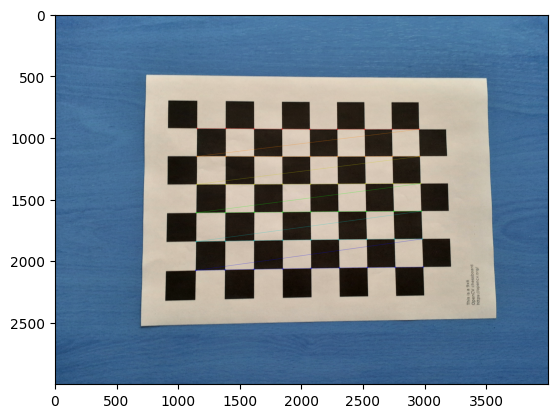

In [26]:
ppl.imshow(cv2.cvtColor(imgs2[0], cv2.COLOR_BGR2RGB))

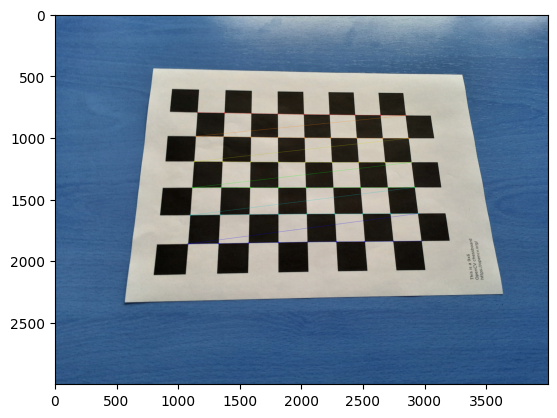

In [27]:
ppl.imshow(cv2.cvtColor(imgs2[1], cv2.COLOR_BGR2RGB))

Para calibrar la cámara, además de las coordenadas de
las esquinas en cada una de las imágenes, se necesitan las
coordenadas tridimensionales de las esquinas en el sistema
de referencia de la escena. Para esta práctica consideraremos que el centro del sistema de referencia, esto es, el
punto de coordenadas $[0, 0, 0]^\top$, es la primera esquina de
la plantilla de calibración detectada en todas las imágenes.
También consideraremos que el eje X corresponde al lado
corto de la plantilla de calibración, y el eje Y al lado largo.
Esta disposición implica que el eje Z apunta en la dirección
normal hacia arriba del plano de calibración.

Para el siguiente ejercicio es muy importante tener en
cuenta que las coordenadas de las esquinas en el sistema de
referencia de la escena deben darse en el mismo orden que
en el que fueron detectadas en cada una de las imágenes.

**Ejercicio 3.** Implementa la función ``get_chessboard_points(chessboard_shape, dx, dy)`` que genere una matriz de NumPy (es decir, un ndarray) de
tamaño $N × 3$ con las coordenadas $(x,y,z)$, resp. (*columna, fila, 0*),  de las esquinas de
la plantilla de calibración en el sistema de referencia de la
escena. $N$ es el número de esquinas de la plantilla.

``chessboard_shape`` es el número de puntos (*columnas, filas*) de la plantilla de calibración. Al igual que
en el Ejercicio 1, debe ser (9, 6). ``dx`` (resp. ``dy``) es el ancho
(resp. alto) de un escaque de la plantilla de calibración.
Para la plantilla utilizada en esta práctica, ambos valores son 22.4 mm.

In [29]:
def get_chessboard_points(chessboard_shape, dx, dy):
    points = []
    for i in range(chessboard_shape[1]):
        for j in range(chessboard_shape[0]):
            point = (j*dx, i*dy, 0)
            points.append(point)

    return np.array(points)

cb_points = get_chessboard_points((9, 6), 22.4, 22.4)
print(cb_points)

[[  0.    0.    0. ]
 [ 22.4   0.    0. ]
 [ 44.8   0.    0. ]
 [ 67.2   0.    0. ]
 [ 89.6   0.    0. ]
 [112.    0.    0. ]
 [134.4   0.    0. ]
 [156.8   0.    0. ]
 [179.2   0.    0. ]
 [  0.   22.4   0. ]
 [ 22.4  22.4   0. ]
 [ 44.8  22.4   0. ]
 [ 67.2  22.4   0. ]
 [ 89.6  22.4   0. ]
 [112.   22.4   0. ]
 [134.4  22.4   0. ]
 [156.8  22.4   0. ]
 [179.2  22.4   0. ]
 [  0.   44.8   0. ]
 [ 22.4  44.8   0. ]
 [ 44.8  44.8   0. ]
 [ 67.2  44.8   0. ]
 [ 89.6  44.8   0. ]
 [112.   44.8   0. ]
 [134.4  44.8   0. ]
 [156.8  44.8   0. ]
 [179.2  44.8   0. ]
 [  0.   67.2   0. ]
 [ 22.4  67.2   0. ]
 [ 44.8  67.2   0. ]
 [ 67.2  67.2   0. ]
 [ 89.6  67.2   0. ]
 [112.   67.2   0. ]
 [134.4  67.2   0. ]
 [156.8  67.2   0. ]
 [179.2  67.2   0. ]
 [  0.   89.6   0. ]
 [ 22.4  89.6   0. ]
 [ 44.8  89.6   0. ]
 [ 67.2  89.6   0. ]
 [ 89.6  89.6   0. ]
 [112.   89.6   0. ]
 [134.4  89.6   0. ]
 [156.8  89.6   0. ]
 [179.2  89.6   0. ]
 [  0.  112.    0. ]
 [ 22.4 112.    0. ]
 [ 44.8 112. 

**Ejercicio 4.** Calibra la cámara usando la lista de resultados de ``cv2.findChessboardCorners`` y el conjunto de puntos del modelo dados por ``get_chessboard_points``, del ejercicio anterior. 

In [30]:
# Extract the list of valid images with all corners
valid_corners = cornersRefined
num_valid_images = len(valid_corners)

print(num_valid_images)

30


In [31]:

# Prepare input data
# object_points: numpy array with dimensions (number_of_images, number_of_points, 3)
obj = np.zeros((6*9,3), np.float32)
obj[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)


# image_points: numpy array with dimensions (number_of_images, number_of_points, 2)
image_points = []
object_points = []

for corner in cornersRefined:
    object_points.append(obj)
    image_points.append(corner)

# Calibrate for square pixels corners standard
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, (4000, 3000), None, None,
                                                                 flags=cv2.CALIB_FIX_ASPECT_RATIO)

print("Corners standard intrinsics:\n", intrinsics)
print("Corners standerd dist_coefs:", dist_coeffs)
print("rms:", rms)

Corners standard intrinsics:
 [[3.00163352e+03 0.00000000e+00 2.02083123e+03]
 [0.00000000e+00 3.00163352e+03 1.49663858e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Corners standerd dist_coefs: [[ 0.1005719  -0.37585689  0.00066366  0.00147774  0.4760869 ]]
rms: 1.856357869137513


1.8563578691375082


Presta atención al parámetro de salida ``rms`` ¿qué significa este parámetro? ¿Se obtiene un valor razonable? ¿Qué pasa con el ``rms`` y la matriz de intrínsecos ``K`` si calibramos con las mismas imágenes pero con un tamaño de 1/4 del ancho y del alto? 

Utiliza la función de OpenCV cv.undistort para visualizar una imagen de calibración y el resultado una vez eliminada la distorsión radial (si existe distorsión la imagen rectificada aparecerá con algunas partes en negro):

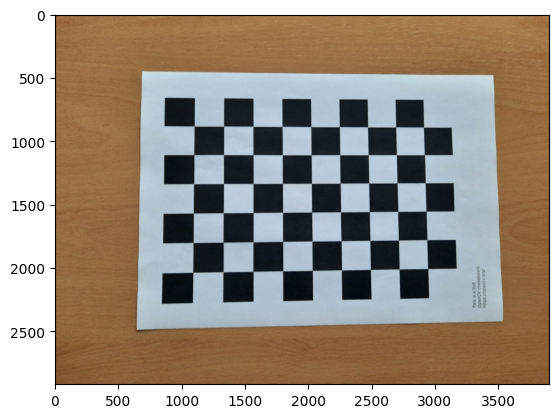

In [32]:
img = cv2.imread("MaterialesPráctica/calibration_pattern/20230215_175004.jpg")
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(intrinsics, dist_coeffs, (w,h), 1, (w,h))

dst = cv2.undistort(img, intrinsics, dist_coeffs, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
ppl.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

**Ejercicio 5.** Implementa una función ``plotCamera3D(K, rvec, tvec, axes)`` que dibuje los ejes del sistema de referencia de la escena en 3D, el centro óptico de la cámara como un punto 3D y los ejes del sistema de referencia de la cámara expresados en el de la escena. A esta función se le pasan los intrínsecos (matriz $3x3$), y los extrínsecos: el vector de rotación ``rvec`` ($3x1$), y el vector de traslación ``tvec`` ($3x1$). El parámetro ``axes`` son los ejes de matplotlib configurados para dibujar en 3D. 

In [43]:
def plot3DPoints(Pts, axes):
    
    x = Pts[:, 0]
    y = Pts[:, 1]
    z = Pts[:, 2]
    axes.scatter3D(x, y, z, 'k')    
    

def plotCamera3D(K, rvec, tvec, axes=None):
    
    if axes is None:
        axes = ppl.axes(projection = '3d')
        
    # Para poder mover el punto de vista en la ventana 3D interactivamente, hay que descomentar "%matplotlib tk" 
    # habrá que usar axes.scatter3d y/o axes.plot3d
    R, _ = cv2.Rodrigues(rvec)
    P = K @ np.hstack((R, tvec))

    # Generar los puntos 3D en los ejes y proyectarlos sobre la imagen.
    points3D = np.array([[5, 0, 0, 1], [0, 5, 0, 1], [0, 0, 5, 1], [0, 0, 0, 1]]).T
    plot3DPoints(points3D, axes)

    points2D = P @ points3D
    points2D /= points2D[2]

    ppl.figure()
    ppl.imshow(img)

    # Plot the axis projection
    ppl.plot((points2D[0][0], points2D[0][3]), (points2D[1][0], points2D[1][3]), '-r')
    ppl.plot((points2D[0][1], points2D[0][3]), (points2D[1][1], points2D[1][3]), '-g')
    ppl.plot((points2D[0][2], points2D[0][3]), (points2D[1][2], points2D[1][3]), '-b')



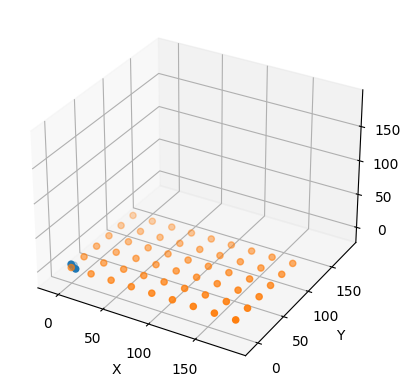

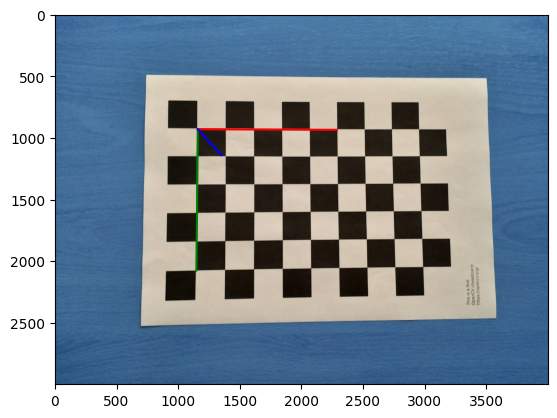

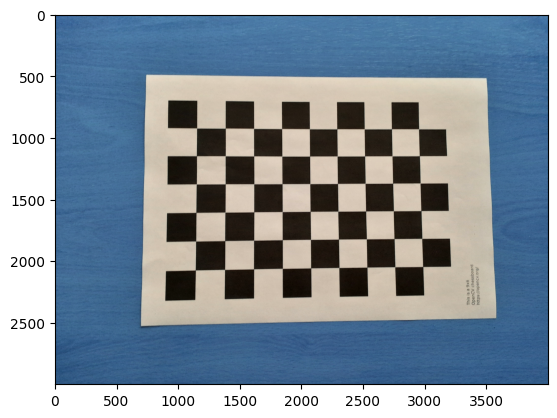

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Cambiar para una imagen de calibración diferente
image_index = 0
ppl.figure()
axes = ppl.axes(projection='3d')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')
plotCamera3D(intrinsics, rvecs[image_index], tvecs[image_index], axes)
plot3DPoints(cb_points, axes) # pintar esquinas del "ajedrez" en 3D

# Importante para que los ejes 3D tengan las mismas proporciones en
# matplotlib
scaling = np.array([getattr(axes, 'get_{}lim'.format(dim))() for dim in 'xyz']); axes.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)

# Mostrar resultados en 3D
ppl.show()

ppl.figure()
ppl.imshow(cv2.cvtColor(images[image_index], cv2.COLOR_BGR2RGB))

Usando la función desarrollada, ``plotCamera3D``, pintar en 3D los ejes del sistema de referncia de la escena, los puntos de la plantilla de calibración y todas las cámaras que tomaron las imágenes en ``template4``.

Ejemplo de lo que se busca (sacado del [Matlab Calibration toolbox](http://robots.stanford.edu/cs223b04/JeanYvesCalib/htmls/example.html)):

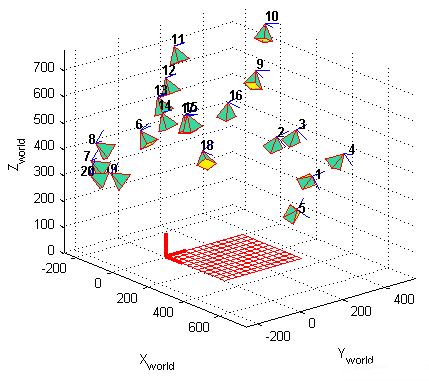

In [ ]:
ppl.figure()
axes = ppl.axes(projection='3d')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')
plot3DPoints(cb_points, axes) # pintar esquinas del "ajedrez" en 3D

... POR HACER ...

scaling = np.array([getattr(axes, 'get_{}lim'.format(dim))() for dim in 'xyz']); axes.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)
ppl.show()

**Ejercicio 6.** Implementa una función ``plotTemplates3D(K, rvecs, tvecs, axes)`` que dibuje en 3D todas las posiciones de los puntos de la plantilla de calibración que tomaron en las diferentes imágenes. El resultado será una escena con el sistema de referencia de la cámara en el origen $(0,0,0)$, sus ejes dibujados a lo largo de X, Y, Z y tantas rejillas de puntos como imágenes se han tomado de la plantilla de calibración. A esta función se le pasan los intrínsecos (matriz $3x3$), y los extrínsecos de todas las imágenes de calibración: los vectores de rotación ``rvecs`` (lista de vectores $3x1$), y los vectores de traslación ``tvecs`` (lista de vectores $3x1$). El parámetro ``axes`` son los ejes de matplotlib configurados para dibujar en 3D. 

Ejemplo de lo que se busca (sacado del [Matlab Calibration toolbox](http://robots.stanford.edu/cs223b04/JeanYvesCalib/htmls/example.html)):

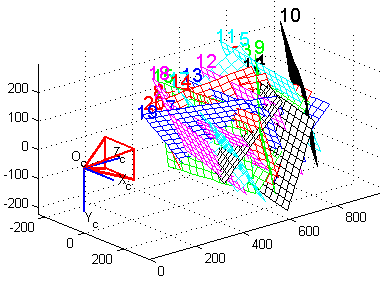

In [ ]:
def plotTemplates3D(template_3d_points, rvecs, tvecs, axes=None):
      
    if axes is None:
        axes = ppl.axes(projection = '3d')
        
     
    for i in range(0, len(rvecs)):
    
      # Para cada imagen de la plantila de calibración con sus extrínsecos vamos a dibujar los 
      # puntos 3D de la plantilla de calibración en coordenadas del Sist. de Referencia de la cámara.
      ... POR HACER ..

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

ppl.figure()
axes = ppl.axes(projection='3d')
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('Z')

plotTemplates3D(cb_points, rvecs, tvecs, axes)

scaling = np.array([getattr(axes, 'get_{}lim'.format(dim))() for dim in 'xyz']); 
axes.auto_scale_xyz(*[[np.min(scaling), np.max(scaling)]]*3)
ppl.show()

###  1.1 Parámetros intrínsecos

Una de las características intrínsecas de una cámara más fácilmente comprensible es su ángulo de visión o campo
de visión (FOV), o el campo de visión de cualquier región en ella. El campo de visión es la amplitud angular de una
determinada escena y se suele expresar en grados. 

**Ejercicio 7.** En las imágenes tomadas por dispositivos digitales se almacena información sobre la cámara que tomó la foto en un formato denominado [EXIF](https://es.wikipedia.org/wiki/Exchangeable_image_file_format). Esta información se puede leer con programas de retoque fotográfico libres como [GIMP](https://www.gimp.org/downloads/).

Dados los intrísecos en K del proceso de calibración, y sabiendo que el móvil que tomó la foto es un modelo Samsung A51 (SM-A515F/DSN) con un sensor Sony IMX586, calcular la focal en mm de la cámara a partir de K. Se pide comparar el resultado con la información EXIF de las imágenes.

Resuelve en primer lugar el ejercicio analíticamente y, posteriormente, implementa dicha respuesta y calcula un resultado numérico.

In [59]:
# Analizando la imagen con GIMP se puede observar que la focal de la camara que ha sacado las fotografías contenidas en "departamental2_urjc" es de 4.6 mm.
# Teniendo en cuenta que los pixeles del sensor especificados miden 0.8x0.8 micrometros

f = intrinsics[0, 0]
print(f"Focal en pixeles: {f} \n"
      f"Focal en mm teniendo en cuenta 1.6um/px: {f * 1.6 * (1/1000)}")


Focal en pixeles: 3001.6335187504615 
Focal en mm teniendo en cuenta 1.6um/px: 4.802613630000739


**Ejercicio 8.** Conociendo los intrínsecos K y el tamaño en píxeles de la imagen, calcula el ángulo de visión horizontal de la cámara (el relacionado con el ancho de la imagen).


Resuelve en primer lugar el ejercicio analíticamente y, posteriormente, implementa dicha respuesta y calcula un resultado numérico.

Sabiendo que el sensor de la cámara es el Sony IMX586, montado en un móvil Samsung A51, calcular el ángulo de visión horizontal de la cámara utilizando las medidas físicas del mismo en mm (focal proveniente de EXIF, ancho, alto, etc):

**Ejercicio 9.** Calcula cuánto se ha trasladado la cámara entre las imágenes ``20230215_175019.jpg``  y ``20230215_175042.jpg``.

Resuelve en primer lugar el ejercicio analíticamente y, posteriormente, implementa dicha respuesta y calcula un resultado numérico.

Utilizando ``plotCamera3D(K, rvec, tvec, axes)`` pintar las cámaras y la rejilla de calibración en 3D para visualizar la situación de las mismas:

## 2. Calibración a partir de una imagen

En esta sección se pretende calibrar la misma cámara que en las secciones anteriores pero esta vez utilizando una única imagen.

En el material de la práctica se proporciona:

  1. Una imagen de un cubo de Rubick de 6 cm de lado, con caras de 4x4 cuadrados donde cada uno mide 1,5 cm.
  2. Imágenes tomadas en interiores del Departamental II con el mismo móvil y resolución, directorio ``departamental2_urjc``. 

Aplicando la teoría vista en clase, en esta sección se pretende que el alumno calibre la cámara utilizando las imágenes proporcionadas y empleando el método que considere oportuno en cada caso.

**Ejercicio 10.** Se desea estimar los intrínsecos de la cámara a partir de la imagen del cubo de Rubik utilizando las coordenadas los puntos 3D de las esquinas de todos o algunos de los cuadrados visibles del cubo (habrá que definir el sistema de referencia sobre el mismo) y sus correspondencias 2D en la imagen.

En este ejercicio se pide localizar los puntos 2D asociados a cada punto 3D del cubo de Rubik que vayamos a utilizar (se podrá utilizar la función ``askpoints(imagen)`` para pinchar con el ratón) y resolver el sistema de ecuaciones visto en clase que nos da la matriz de proyección completa.

Resuelve en primer lugar el ejercicio analíticamente y, posteriormente, implementa dicha respuesta y calcula un resultado numérico. Comparar el resultado con la K obtenida calibrando la cámara con el algoritmo de OpenCV.



In [63]:
def askpoints(img):
    """Ask for a list of point correspondences in one image."""
    
    points1 = []
    
    # Prepare the two images.
    fig = ppl.gcf()
    ax1 = ppl.subplot(1,1,1)
    ax1.imshow(img, cmap="gray")
    ax1.axis('image')
    ppl.draw()
    
    ax1.set_xlabel("Choose a points in image (or right click to end)")
    p1 = ppl.ginput(1, timeout=-1, show_clicks=False, mouse_pop=2, mouse_stop=3)
    index = 0
    while len(p1) != 0:
        p1 = p1[0]
        ax1.plot(p1[0], p1[1], '.r')
        ax1.text(p1[0], p1[1], str(index), color="white")
        ax1.set_xlabel('')
               
        points1.append(p1)
        
        ax1.set_xlabel("Choose a point in left image (or right click to end)")
        p1 = ppl.ginput(1, timeout=-1, show_clicks=False, mouse_pop=2, mouse_stop=3)
        index += 1 
    
    ax1.set_xlabel('')
    ppl.draw()
    
    # swap point co-ordinates
    return np.array(points1).T

/tmp/ipykernel_10430/999489404.py:14: UserWarning: Matplotlib is currently using TkAgg, which is a non-GUI backend, so cannot show the figure.
  p1 = ppl.ginput(1, timeout=-1, show_clicks=False, mouse_pop=2, mouse_stop=3)


KeyboardInterrupt: 

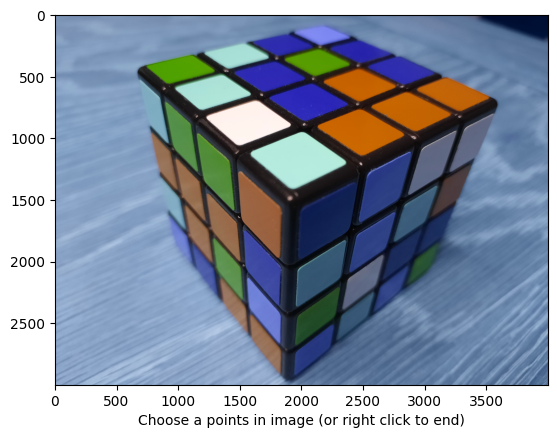

In [65]:
# Calibrar la cámara con una única imagen.
image = cv2.imread("MaterialesPráctica/cubo_rubik_4x4/cubo4x4_1.jpg")
coordinates = askpoints(image)


**Ejercicio 11.** Se desea estimar los intrínsecos de la cámara a partir de una única imagen. El alumno deberá elegir una de las imágenes que aparece en el directorio ``departamental2_urjc``.

Resuelve en primer lugar el ejercicio analíticamente y, posteriormente, implementa dicha respuesta y calcula un resultado numérico. Comparar el resultado con la K obtenida calibrando la cámara con el algoritmo de OpenCV.

Sugerencia: Localizar direcciones ortogonales en la escena y sus puntos de fuga asociados.